In [9]:
import sys
sys.path.append(r"C:\Users\N1259534\Desktop\Projects\QAOA_simulation_LV")

In [10]:
import numpy as np
from itertools import combinations
import scipy
import networkx as nx
import matplotlib.pyplot as plt

from QAOA_mtrix_simulation.QAOA_objective import get_qaoa_objective




In [17]:
#Step 1: Generate terms

N = 4
np.random.seed(10)
terms = [(np.random.normal(), spin_pair) for spin_pair in combinations(range(N), r=2)]

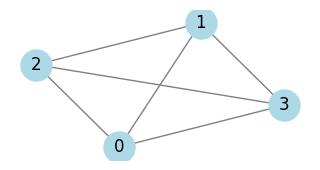

In [18]:
G = nx.Graph()
for weight, (node1, node2) in terms:
    G.add_edge(node1, node2, wight=round(weight, 2))
    
plt.figure(figsize=(3, 1.5))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=12)


plt.show()

In [21]:
# Step 2: get QAOA objective
# Get objective
p = 5
f = get_qaoa_objective(N, p, terms=terms, parameterization='theta')

NameError: name 'get_qaoa_objective' is not defined

In [ ]:
# Step 3: Optimize QAOA parameters

initial_gamma = -1*np.linspace(0, 1, p)
initial_beta = np.linspace(1, 0, p)

res = scipy.optimize.minimize(f, np.hstack([initial_gamma, initial_beta]), method='COBYLA', options={'rhobeg': 0.01})

In [ ]:
print(f"Expected QAOA solution quality: {res.fun:.5f}")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(-res.x[:p], label=r"$\gamma$")
plt.plot(res.x[p:], label=r"$\beta$")
plt.title('Optimized QAOA parameters')
plt.legend()